In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
file_path = "Diagonalization/diagonalizaton_results_"


# Diagonalization algorithm
df_diag_mixed = pd.read_csv(file_path + "Mixed_Diag.csv")
df_diag_PVs = pd.read_csv(file_path + "Fixed_PVs_Diag.csv")
df_diag_EVs = pd.read_csv(file_path + "Fixed_EVs_Diag.csv")

# AHE algorithm
df_ahe_mixed = pd.read_csv(file_path + "Mixed_AHE.csv")
df_ahe_PVs = pd.read_csv(file_path + "Fixed_PVs_AHE.csv")
df_ahe_EVs = pd.read_csv(file_path + "Fixed_EVs_AHE.csv")

#FP Algorithm
df_fp_mixed = pd.read_csv(file_path + "Mixed_FP.csv")
df_fp_PVs = pd.read_csv(file_path + "Fixed_PVs_FP.csv")
df_fp_EVs = pd.read_csv(file_path + "Fixed_EVs_FP.csv")

#SFP Algorithms
df_sfp_mixed = pd.read_csv(file_path + "Mixed_SFP.csv")
df_sfp_PVs = pd.read_csv(file_path + "Fixed_PVs_SFP.csv")
df_sfp_EVs = pd.read_csv(file_path + "Fixed_EVs_SFP.csv")


In [51]:
# add all dataframes 
df_all = [df_diag_mixed, df_diag_PVs, df_diag_EVs, 
          df_ahe_mixed,  df_ahe_PVs,  df_ahe_EVs, 
          df_fp_mixed,   df_fp_PVs,   df_fp_EVs, 
          df_sfp_mixed,  df_sfp_PVs,  df_sfp_EVs ]

algo_list = ["Diag", "AHE", "FP", "SFP"]

scen_list = ["Mixed", "Fixed_EVS", "Fixed_PVs"]

#****************************************************
offer_dict = dict()
for i in range(1,10):
    if i%2==0:
        offer_dict['offer_0'+str(i)] = "CAT_01"
    elif i%3==0:
        offer_dict['offer_0'+str(i)] = "CAT_02"
    else:
        offer_dict['offer_0'+str(i)] = "CAT_03"

#********************************************************
bids_dict = dict()
for i in range(1,10):
    if i%2==0:
        bids_dict['offer_0'+str(i)] = "CAT_01"
    elif i%3==0:
        bids_dict['offer_0'+str(i)] = "CAT_02"
    else:
        bids_dict['offer_0'+str(i)] = "CAT_03"
#****************************************************
col_dict= dict()
for i in range(1,10):
    col_dict[str(i)] = "DA"+str(i)

In [52]:
for df in df_all:
    df.drop(df[df.Iteration==0].index, inplace=True)
    df.drop(columns=['Unnamed: 0'], inplace=True)

In [53]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

In [54]:
#**********************************************************
offer_col = ['offer_0'+str(x) for x in range(1,10)]
time_offer =['Time']
time_offer = [*offer_col, *time_offer]

#**********************************************************************
demand_col = ['bids_0'+str(x) for x in range(1,10)]
time_demand =['Time']
time_demand = [*demand_col, *time_demand]

# Offers, Demands  Last N Iterations Plot

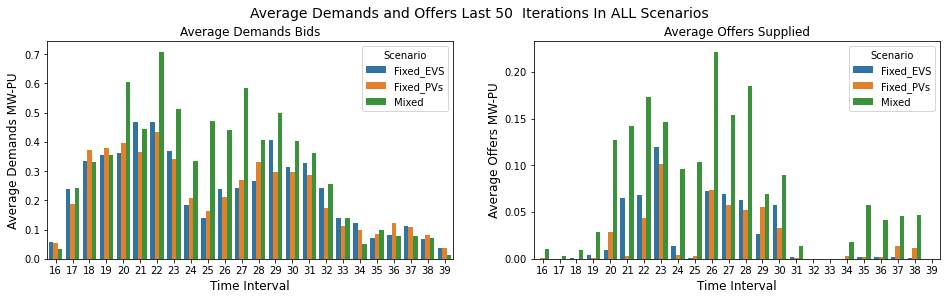

In [55]:
counter = 0
counter_scen=0
demand = []
offer =[]
scenario=[]
time=[]

# how many last iterations to show
last_iterations = 50
no_iterations = 300

#iterate trough all dataframes and average their offers bids : all DAs in each 3 scenario
for df in df_all:
    no_iterations = len(df.groupby('Iteration').mean())
    if no_iterations > last_iterations:
        df = df[df['Iteration'] > no_iterations - last_iterations]
    temp_offer = df.groupby('Time').mean().drop(columns=['Iteration']).reset_index()[time_offer].drop('Time',axis=1).mean(axis=1)
    temp_demand = df.groupby('Time').mean().drop(columns=['Iteration']).reset_index()[time_demand].drop('Time',axis=1).mean(axis=1)
    count=16
    for i in range(len(temp_offer)):
        demand.append(temp_demand[i])
        offer.append(temp_offer[i])
        scenario.append(scen_list[counter%3])
        time.append(count)
        count+=1
    counter+=1
    if counter % 3 == 0:
        counter_scen+=1

# Create Dataframe from listed Values
df_demand = pd.DataFrame({'Demands':demand,  'Scenario':scenario, 'Time':time})
df_offer = pd.DataFrame({"Offer":offer, 'Scenario':scenario, 'Time':time})

# Slice Dataframe for different plots

fig, axes = plt.subplots(1, 2, figsize=(16, 4))

sns.barplot(data= df_demand.groupby(['Time', 'Scenario']).mean().reset_index(),
            x='Time', y='Demands', hue='Scenario' , ax=axes[0])
axes[0].set_title("Average Demands Bids", fontsize=12)
axes[0].set_xlabel('Time Interval',fontsize=12);
axes[0].set_ylabel('Average Demands MW-PU',fontsize=12);

sns.barplot(data= df_offer.groupby(['Time', 'Scenario']).mean().reset_index(),
            x='Time', y='Offer', hue='Scenario' , ax=axes[1])
axes[1].set_title("Average Offers Supplied", fontsize=12)
axes[1].set_xlabel('Time Interval',fontsize=12);
axes[1].set_ylabel('Average Offers MW-PU',fontsize=12);

fig.suptitle('Average Demands and Offers Last %d  Iterations In ALL Scenarios'%last_iterations, fontsize=14, y=1.);

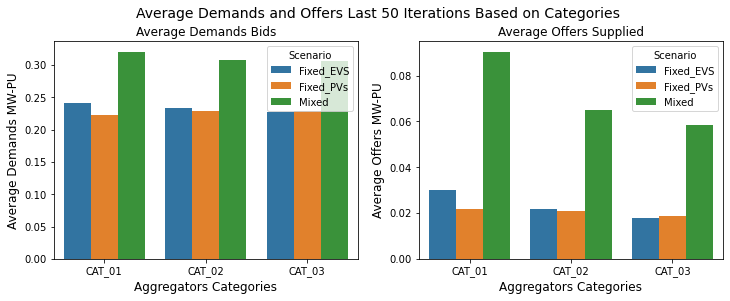

In [92]:
counter = 0
counter_scen=0
demand = []
offer =[]
scenario=[]
DAs_Cat=[]


# how many last iterations to show
last_iterations = 50
no_iterations = 300

#iterate trough all dataframes and average their offers bids : all DAs in each 3 scenario
for df in df_all:
    no_iterations = len(df.groupby('Iteration').mean())
    if no_iterations > last_iterations:
        df = df[df['Iteration'] > no_iterations - last_iterations]
    temp_offer = df[time_offer].drop('Time', axis=1).mean()
    temp_demand = df[time_demand].drop('Time', axis=1).mean() 
    
    for i in range(len(temp_offer)):
        demand.append(temp_demand[i])
        offer.append(temp_offer[i])
        cat = temp_offer.index[i]
        DAs_Cat.append(offer_dict[cat])
        scenario.append(scen_list[counter%3])
        
    counter+=1
    if counter % 3 == 0:
        counter_scen+=1

# # Create Dataframe from listed Values
df_demand = pd.DataFrame({'Demands':demand, 'Offer':offer,  'Scenario':scenario, 'Category':DAs_Cat})
#df_demand = df_demand.groupby(['Scenario', 'Category']).mean().reset_index().melt(id_vars=['Scenario','Category'],  var_name="Bid_Type", value_name="Bid_Value")

# df_offer = pd.DataFrame({"Offer":offer, 'Scenario':scenario, 'Time':time})
# df_compare = pd.DataFrame({'Demands':demand,  "Offer":offer, 'Scenario':scenario, 'Time':time})
# # Slice Dataframe for different plots

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.barplot(data= df_demand.groupby(['Scenario', 'Category']).mean().reset_index(),
            x='Category', y='Demands', hue='Scenario' , ax=axes[0])
axes[0].set_title("Average Demands Bids", fontsize=12)
axes[0].set_xlabel('Aggregators Categories',fontsize=12);
axes[0].set_ylabel('Average Demands MW-PU',fontsize=12);

sns.barplot(data= df_demand.groupby(['Scenario', 'Category']).mean().reset_index(),
            x='Category', y='Offer', hue='Scenario' , ax=axes[1])
axes[1].set_title("Average Offers Supplied", fontsize=12)
axes[1].set_xlabel('Aggregators Categories',fontsize=12);
axes[1].set_ylabel('Average Offers MW-PU',fontsize=12);


# sns.barplot(data= df_compare.groupby(['Scenario']).mean().reset_index(),
#             x='Time', y='Offer', hue='Scenario' , ax=axes[2])
# axes[2].set_title("Average Offers Supplied", fontsize=12)
# axes[2].set_xlabel('Time Interval',fontsize=12);
# axes[2].set_ylabel('Average Offers MW-PU',fontsize=12);


fig.suptitle('Average Demands and Offers Last %d Iterations Based on Categories'%last_iterations, fontsize=14, y=1.);



# Offers, Demands  Last N Iterations Based On Algorithms

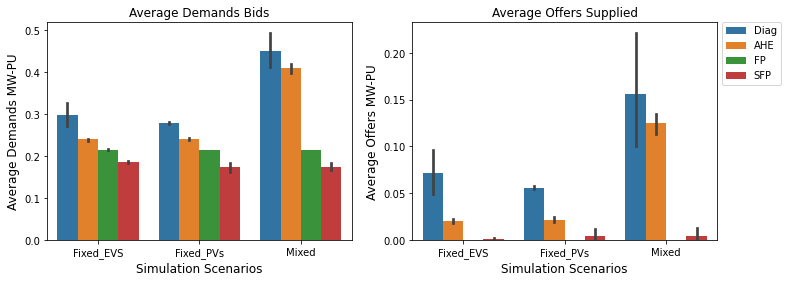

In [111]:
counter = 0
counter_algo=0
demand = []
offer =[]
scenario=[]
DAs_Cat=[]
algos =[]

# how many last iterations to show
last_iterations = 50
no_iterations = 300

#iterate trough all dataframes and average their offers bids : all DAs in each 3 scenario
for df in df_all:
    no_iterations = len(df.groupby('Iteration').mean())
    if no_iterations > last_iterations:
        df = df[df['Iteration'] > no_iterations - last_iterations]
    temp_offer = df[time_offer].drop('Time', axis=1).mean()
    temp_demand = df[time_demand].drop('Time', axis=1).mean() 
    
    for i in range(len(temp_offer)):
        demand.append(temp_demand[i])
        offer.append(temp_offer[i])
        cat = temp_offer.index[i]
        DAs_Cat.append(offer_dict[cat])
        scenario.append(scen_list[counter%3])
        algos.append(algo_list[counter_algo])
    counter+=1
    if counter % 3 == 0:
        counter_algo+=1

# # Create Dataframe from listed Values
df_demand = pd.DataFrame({'Demands':demand, 'Offer':offer,  'Scenario':scenario, 'Category':DAs_Cat, 'Algorithm':algos})
#df_demand = df_demand.groupby(['Scenario', 'Category']).mean().reset_index().melt(id_vars=['Scenario','Category'],  var_name="Bid_Type", value_name="Bid_Value")

# df_offer = pd.DataFrame({"Offer":offer, 'Scenario':scenario, 'Time':time})
# df_compare = pd.DataFrame({'Demands':demand,  "Offer":offer, 'Scenario':scenario, 'Time':time})
# # Slice Dataframe for different plots

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
order =['Diag', 'AHE', 'FP', 'SFP']

sns.barplot(data= df_demand.groupby(['Category','Algorithm','Scenario']).mean().reset_index(),
            x='Scenario', y='Demands', hue='Algorithm' , hue_order=order, ax=axes[0])
axes[0].set_title("Average Demands Bids", fontsize=12)
axes[0].set_xlabel('Simulation Scenarios',fontsize=12);
axes[0].set_ylabel('Average Demands MW-PU',fontsize=12);
axes[0].set_rasterized(True)

sns.barplot(data= df_demand.groupby(['Category','Algorithm','Scenario']).mean().reset_index(),
            x='Scenario', y='Offer', hue='Algorithm' , hue_order=order, ax=axes[1])
axes[1].set_title("Average Offers Supplied", fontsize=12)
axes[1].set_xlabel('Simulation Scenarios',fontsize=12);
axes[1].set_ylabel('Average Offers MW-PU',fontsize=12);
axes[1].set_rasterized(True)

handles, labels = axes[0].get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper right')
fig.legend(handles, labels, bbox_to_anchor=(0.98, 0.90))

for ax in axes:
    ax.get_legend().remove()
    
# fig.suptitle('Average Demands and Offers Last %d Iterations Based on Categories'%last_iterations, fontsize=14, y=1.);



# Demand Bids Line plot Based on Time

In [119]:
selected_offer_DAs=['offer_01', 'offer_02', 'offer_03']
selected_demand_DAs=['bids_01', 'bids_02', 'bids_03']


temp_offer  = df.groupby('Time').mean()[selected_offer_DAs].reset_index()
temp_demand = df.groupby('Time').mean()[selected_offer_DAs].reset_index()

temp_offer[selected_offer_DAs] += temp_demand[selected_offer_DAs]
temp_offer

,Time,offer_01,offer_02,offer_03
0,16,0.0,0.036008,0.010716
1,17,0.0,0.000000,0.000000
2,18,0.0,0.000000,0.000000
3,19,0.0,0.000000,0.000000
4,20,0.0,0.000000,0.000000
5,21,0.0,0.000000,0.000000
6,22,0.0,0.000000,0.000000
7,23,0.0,0.000000,0.000000
8,24,0.0,0.000000,0.000000
9,25,0.0,0.000000,0.000000
